In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
ncep = pd.read_csv('../Resources/NCEP_CFSv2_FULL_LDC.csv')
ncep['LDC_SST_NCEP_CFSv2'] = ncep['LDC_SST_NCEP_CFSv2'] - 273.15

ncep['MON'] = pd.to_datetime(ncep['MON'], format = '%H%M %d %b %Y')
ncep['START'] = ncep['MON'].dt.month
ncep['TARGET'] = ((ncep['START'] + ncep['L']).astype(int))%12
ncep['TARGET'] = ncep['TARGET'].apply(lambda x: 12 if x == 0 else x)

# Calculate the mean grouped by 'L' and 'START' - Nino3.4
ncep_mean = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2'].mean().reset_index()
ncep_mean.rename(columns={'LDC_SST_NCEP_CFSv2': 'MEAN_SST_NCEP_CFSv2'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3.4
ncep_var = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2'].var().reset_index()
ncep_var.rename(columns={'LDC_SST_NCEP_CFSv2': 'VAR_SST_NCEP_CFSv2'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino1+2
ncep_mean_onetwo = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2_ONETWO'].mean().reset_index()
ncep_mean_onetwo.rename(columns={'LDC_SST_NCEP_CFSv2_ONETWO': 'MEAN_SST_NCEP_CFSv2_ONETWO'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino1+2
ncep_var_onetwo = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2_ONETWO'].var().reset_index()
ncep_var_onetwo.rename(columns={'LDC_SST_NCEP_CFSv2_ONETWO': 'VAR_SST_NCEP_CFSv2_ONETWO'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino3
ncep_mean_three = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2_THREE'].mean().reset_index()
ncep_mean_three.rename(columns={'LDC_SST_NCEP_CFSv2_THREE': 'MEAN_SST_NCEP_CFSv2_THREE'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3
ncep_var_three = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2_THREE'].var().reset_index()
ncep_var_three.rename(columns={'LDC_SST_NCEP_CFSv2_THREE': 'VAR_SST_NCEP_CFSv2_THREE'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino4
ncep_mean_four = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2_FOUR'].mean().reset_index()
ncep_mean_four.rename(columns={'LDC_SST_NCEP_CFSv2_FOUR': 'MEAN_SST_NCEP_CFSv2_FOUR'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino4
ncep_var_four = ncep.groupby(['L', 'START'])['LDC_SST_NCEP_CFSv2_FOUR'].var().reset_index()
ncep_var_four.rename(columns={'LDC_SST_NCEP_CFSv2_FOUR': 'VAR_SST_NCEP_CFSv2_FOUR'}, inplace=True)

# Merge the mean and variance DataFrames
dfs = [ncep_mean, ncep_var,ncep_mean_onetwo, ncep_var_onetwo, ncep_mean_three, ncep_var_three, ncep_mean_four, ncep_var_four]
ncep_stat = reduce(lambda left, right: pd.merge(left, right, on=['L', 'START']), dfs)

month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
ncep_stat['TARGET'] = ((ncep_stat['START'] + ncep_stat['L']).astype(int))%12
ncep_stat['TARGET'] = ncep_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
ncep_stat['SZN'] = ncep_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_NCEP_CFSv2','VAR_SST_NCEP_CFSv2',
             'MEAN_SST_NCEP_CFSv2_ONETWO','VAR_SST_NCEP_CFSv2_ONETWO',
             'MEAN_SST_NCEP_CFSv2_THREE','VAR_SST_NCEP_CFSv2_THREE',
             'MEAN_SST_NCEP_CFSv2_FOUR','VAR_SST_NCEP_CFSv2_FOUR' ]
ncep_stat = ncep_stat[new_order]

ncep_stat.to_csv('../Resources/ncep_stat.csv', index=False)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
ncep_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_ncep = ncep_stat[ncep_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_ncep.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_ncep.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_ncep = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    ncep_stat_dfs[f'lead{lead}'] = filtered_ncep
    
ncep_stat_dfs['lead4']

L  START  TARGET  SZN  MEAN_SST_NCEP_CFSv2  VAR_SST_NCEP_CFSv2  \
0   4.5     10       2  JFM          -245.875638            0.996944   
1   4.5     11       3  FMA          -245.724555            0.697347   
2   4.5     12       4  MAM          -245.393227            0.480283   
3   4.5      1       5  AMJ          -245.044193            0.272420   
4   4.5      2       6  MJJ          -245.187908            0.261228   
5   4.5      3       7  JJA          -245.551357            0.515388   
6   4.5      4       8  JAS          -246.295172            0.700295   
7   4.5      5       9  ASO          -247.283557            1.060720   
8   4.5      6      10  SON          -247.747696            1.473076   
9   4.5      7      11  OND          -247.334976            1.954842   
10  4.5      8      12  NDJ          -246.869885            1.731548   
11  4.5      9       1  DJF          -246.238991            1.470624   

    MEAN_SST_NCEP_CFSv2_ONETWO  VAR_SST_NCEP_CFSv2_ONETWO  \
0                    27.277332                   0.600251   
1                    27.777094                   0.455635   
2                    27.291397                   0.406723   
3                    26.141537                   0.299700   
4                    25.050130                   0.554257   
5                    24.503740                   0.955050   
6                    23.782619                   0.883607   
7                    23.057435                   0.571022   
8                    23.060556                   0.364746   
9                    23.683878                   0.456263   
10                   24.689293                   0.548977   
11                   26.084747                   0.668888   

    MEAN_SST_NCEP_CFSv2_THREE  VAR_SST_NCEP_CFSv2_THREE  \
0                   26.759561                  1.115694   
1                   27.289944                  0.820607   
2                   27.574100                  0.651846   
3                   27.507644                  0.365094   
4                   27.001945                  0.321105   
5                   26.494534                  0.661149   
6                   25.718096                  0.848134   
7                   24.771455                  1.030674   
8                   24.342213                  1.157220   
9                   24.640798                  1.599894   
10                  25.098395                  1.604510   
11                  25.970389                  1.482274   

    MEAN_SST_NCEP_CFSv2_FOUR  VAR_SST_NCEP_CFSv2_FOUR  
0                  28.586504                 0.214782  
1                  28.470471                 0.237391  
2                  28.621655                 0.178971  
3                  28.993021                 0.135853  
4                  29.130307                 0.145173  
5                  28.973141                 0.202964  
6                  28.547155                 0.313280  
7                  27.829560                 0.631121  
8                  27.529989                 0.966128  
9                  27.962129                 1.007295  
10                 28.342657                 0.644144  
11                 28.607057                 0.384430

In [12]:
obs = pd.read_csv('../Resources/monthly_obs.csv')

#import gfdl data
gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
gfdl_stat_dfs = {}
# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_stat[gfdl_stat['L'] == i].copy()
    lead = int(i)
    j=1; 
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_stat_dfs[f'lead{lead}'] = filtered_gfdl

#import cola data
cola_stat = pd.read_csv('../Resources/cola_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
cola_stat_dfs = {}
for i in lead_times:
    filtered_cola = cola_stat[cola_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    while j < lead: 
        bottom_row = filtered_cola.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_cola.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_cola = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    cola_stat_dfs[f'lead{lead}'] = filtered_cola


#import canada data
canada_stat = pd.read_csv('../Resources/canada_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
canada_stat_dfs = {}
for i in lead_times:
    filtered_canada = canada_stat[canada_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_canada.iloc[-1:]
        rest_of_df = filtered_canada.iloc[:-1]
        filtered_canada = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    canada_stat_dfs[f'lead{lead}'] = filtered_canada

canada_stat_dfs['lead4']

L  START  TARGET  SZN  MEAN_SST_CanSIPS_IC3  VAR_SST_CanSIPS_IC3  \
0   4.5     10       2  JFM             25.606463             1.756631   
1   4.5     11       3  FMA             25.640460             1.473776   
2   4.5     12       4  MAM             25.924413             1.132097   
3   4.5      1       5  AMJ             26.369487             0.634674   
4   4.5      2       6  MJJ             26.405287             0.423517   
5   4.5      3       7  JJA             26.083090             0.576389   
6   4.5      4       8  JAS             25.615310             0.870332   
7   4.5      5       9  ASO             25.434817             1.222178   
8   4.5      6      10  SON             25.483637             1.408197   
9   4.5      7      11  OND             25.829967             1.764407   
10  4.5      8      12  NDJ             25.782493             1.706342   
11  4.5      9       1  DJF             25.718410             1.722098   

    MEAN_SST_CanSIPS_IC3_ONETWO  VAR_SST_CanSIPS_IC3_ONETWO  \
0                     25.967423                    0.553152   
1                     25.982777                    0.431424   
2                     25.322277                    0.576801   
3                     24.490057                    0.717155   
4                     23.950137                    0.749153   
5                     23.541527                    0.668019   
6                     23.136983                    0.642763   
7                     23.219917                    0.614482   
8                     23.716213                    0.504287   
9                     24.455123                    0.644316   
10                    24.983287                    0.630853   
11                    25.529620                    0.573439   

    MEAN_SST_CanSIPS_IC3_THREE  VAR_SST_CanSIPS_IC3_THREE  \
0                    25.395827                   1.514320   
1                    25.559860                   1.199216   
2                    25.683347                   0.969511   
3                    25.733063                   0.665710   
4                    25.501720                   0.563966   
5                    25.144063                   0.642963   
6                    24.758780                   0.824477   
7                    24.628610                   1.100219   
8                    24.748350                   1.156109   
9                    25.154783                   1.418706   
10                   25.232087                   1.410627   
11                   25.329953                   1.462657   

    MEAN_SST_CanSIPS_IC3_FOUR  VAR_SST_CanSIPS_IC3_FOUR  
0                   27.141220                  1.022167  
1                   27.027327                  0.927967  
2                   27.185030                  0.721952  
3                   27.631663                  0.464228  
4                   27.897293                  0.296975  
5                   27.849780                  0.327597  
6                   27.527823                  0.571405  
7                   27.327510                  0.846367  
8                   27.307750                  1.013828  
9                   27.578603                  1.143089  
10                  27.500803                  1.045848  
11                  27.352487                  1.037978

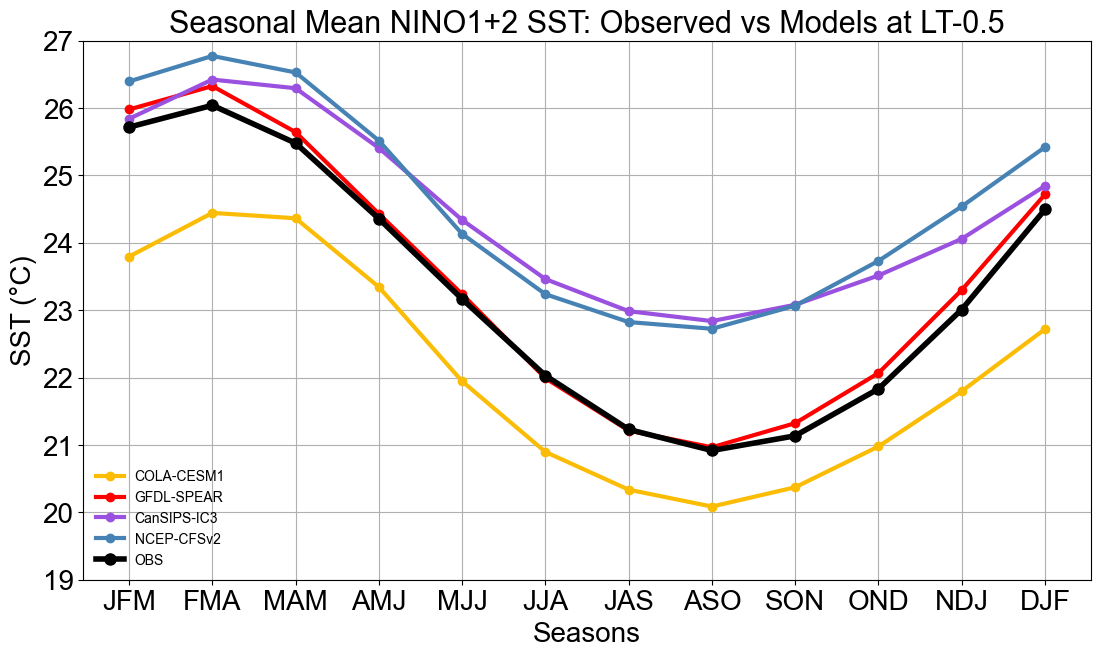

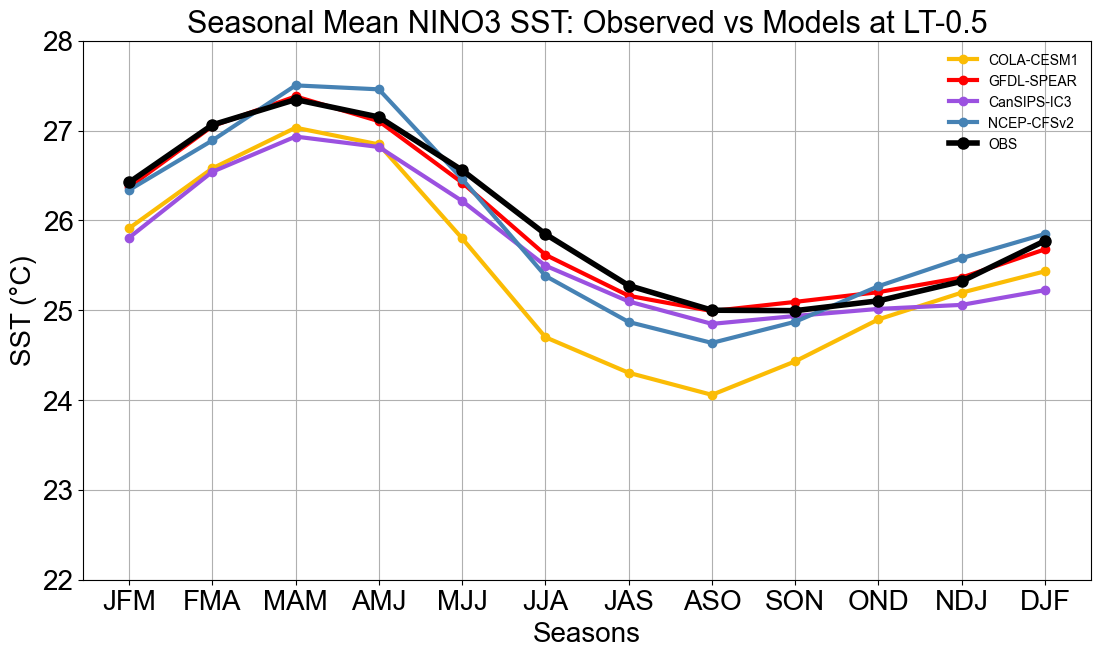

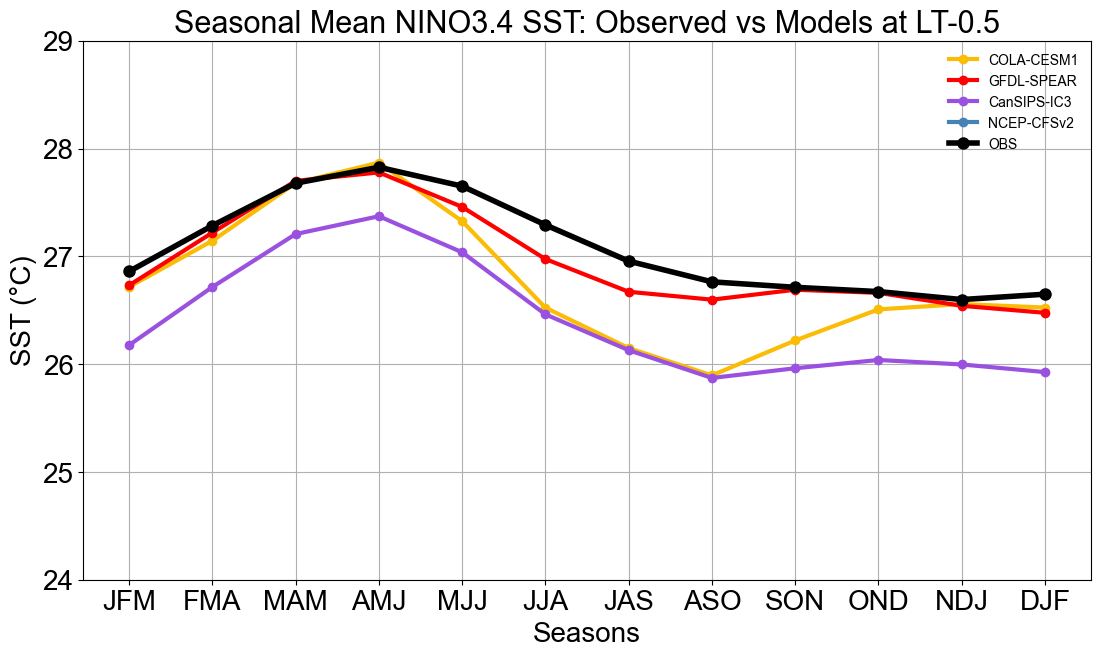

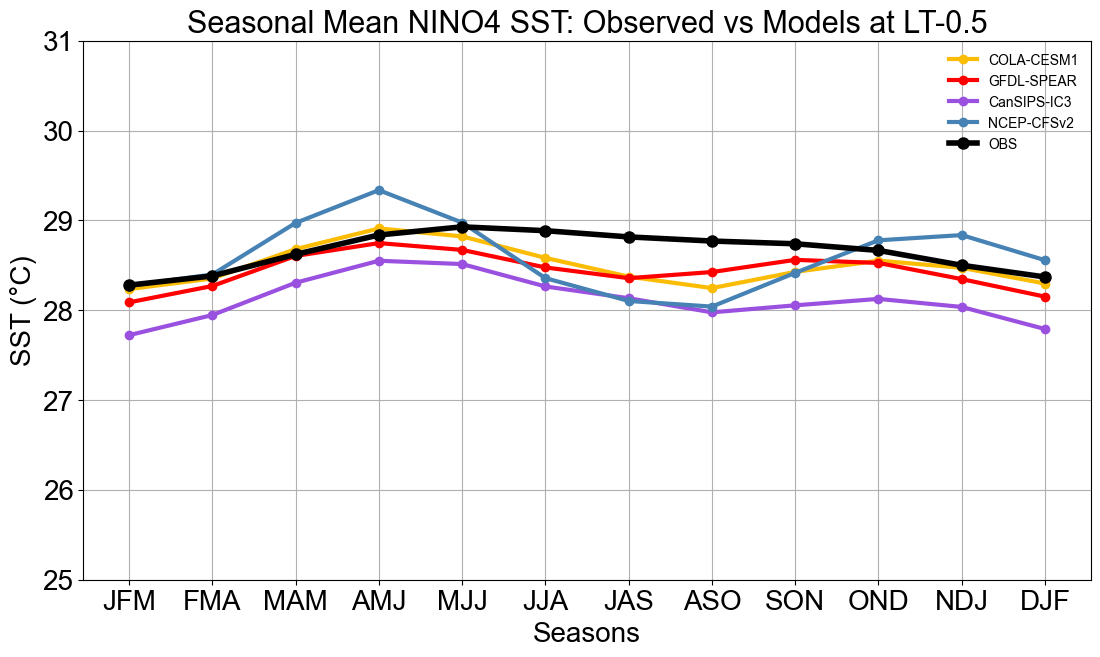

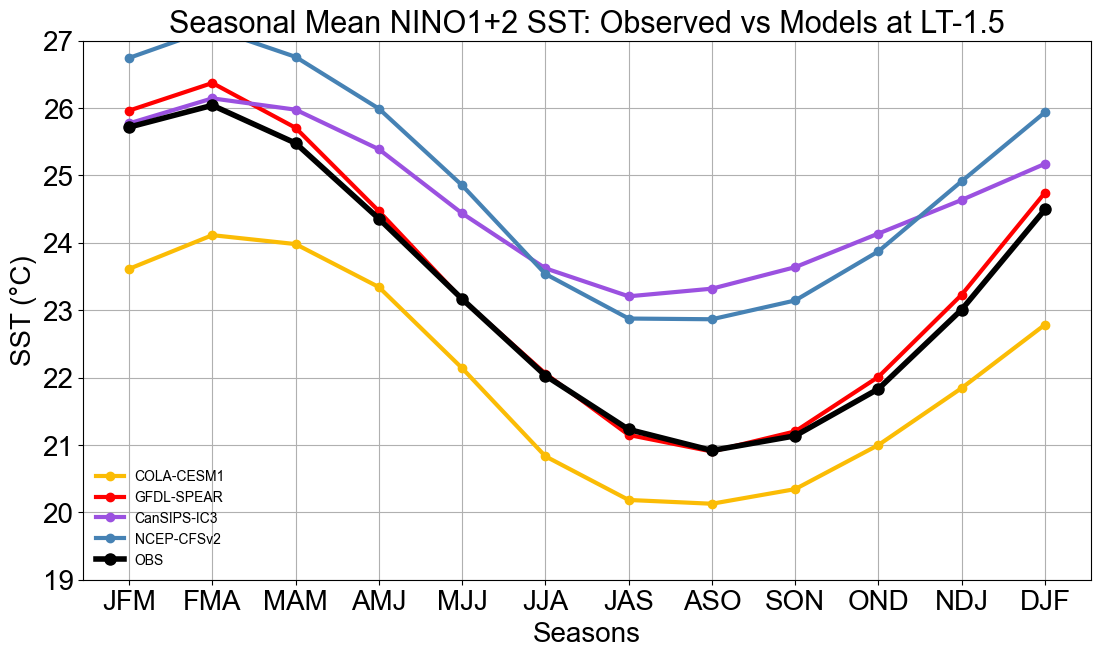

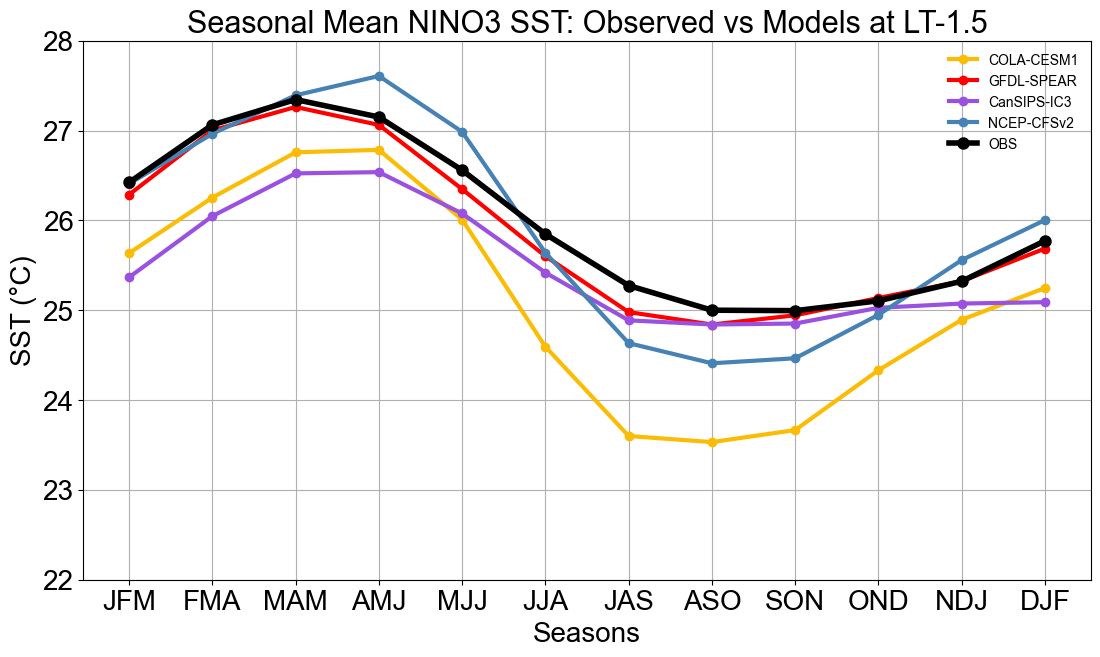

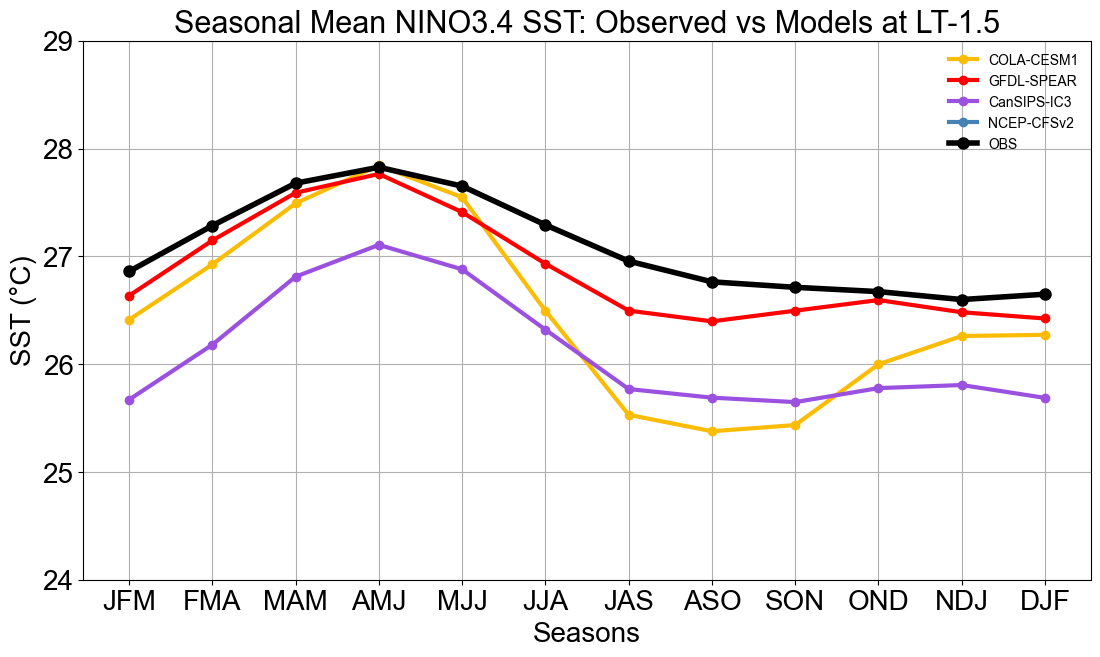

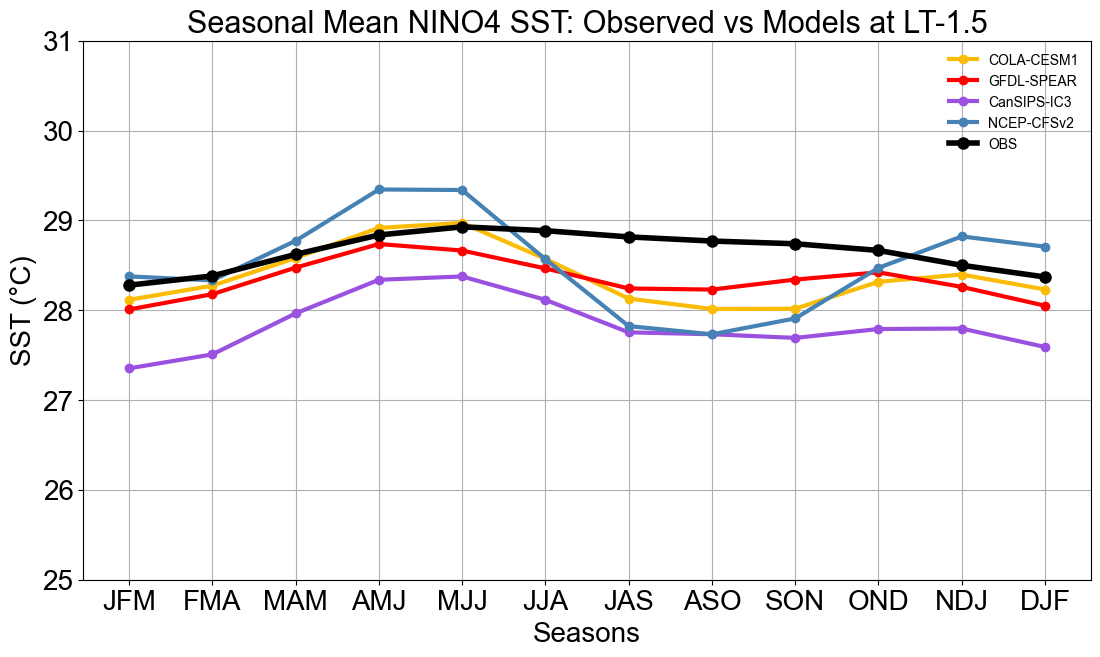

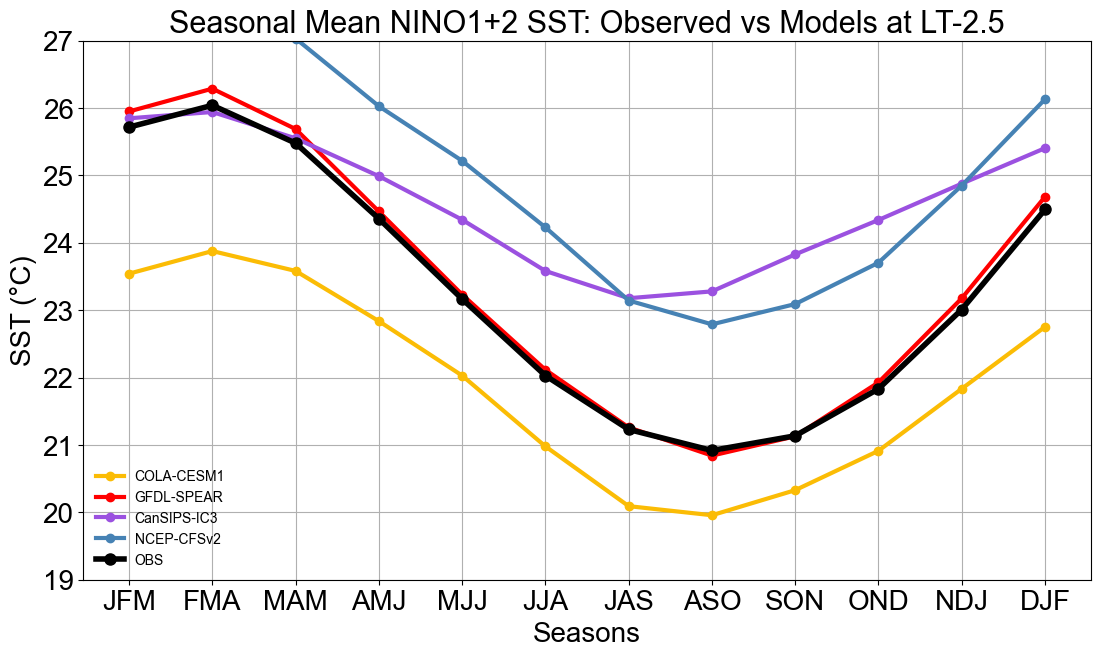

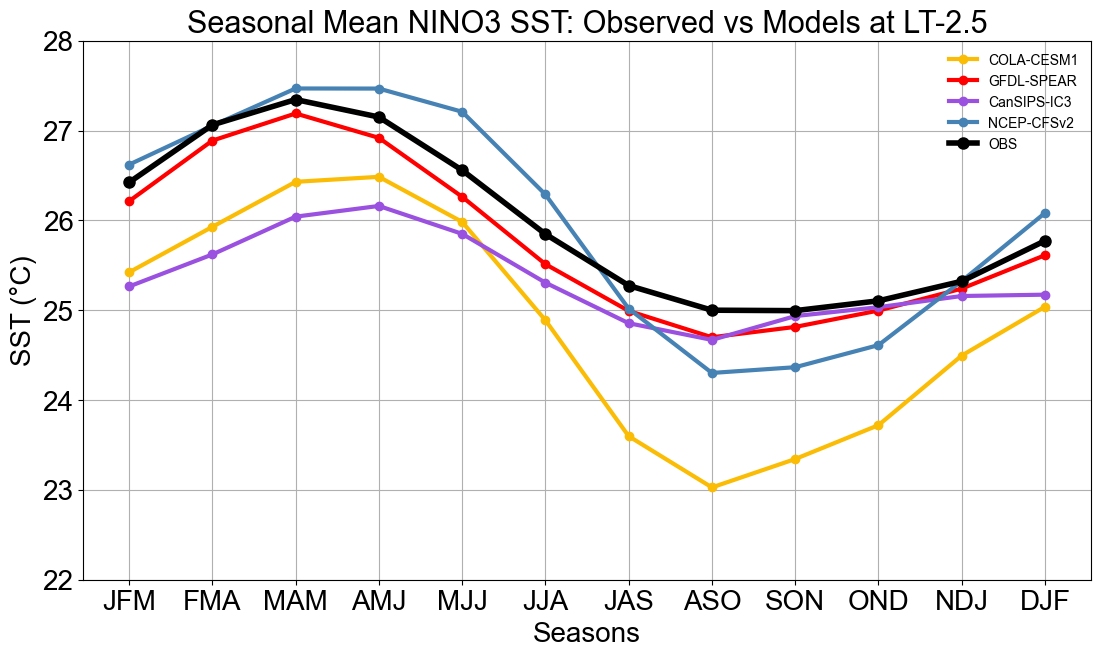

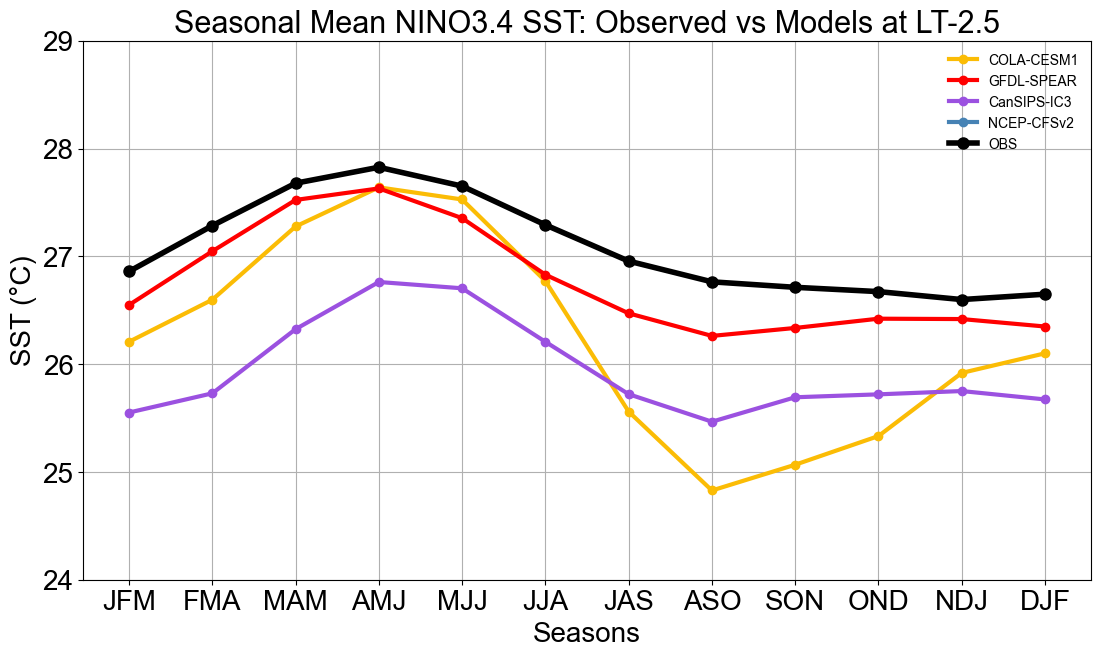

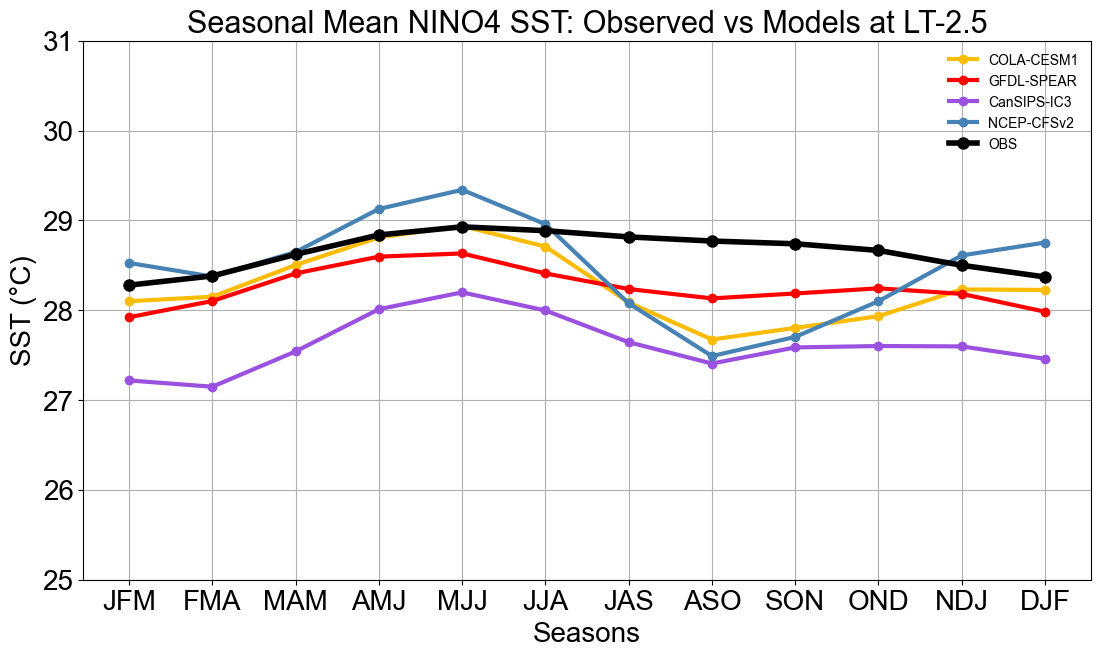

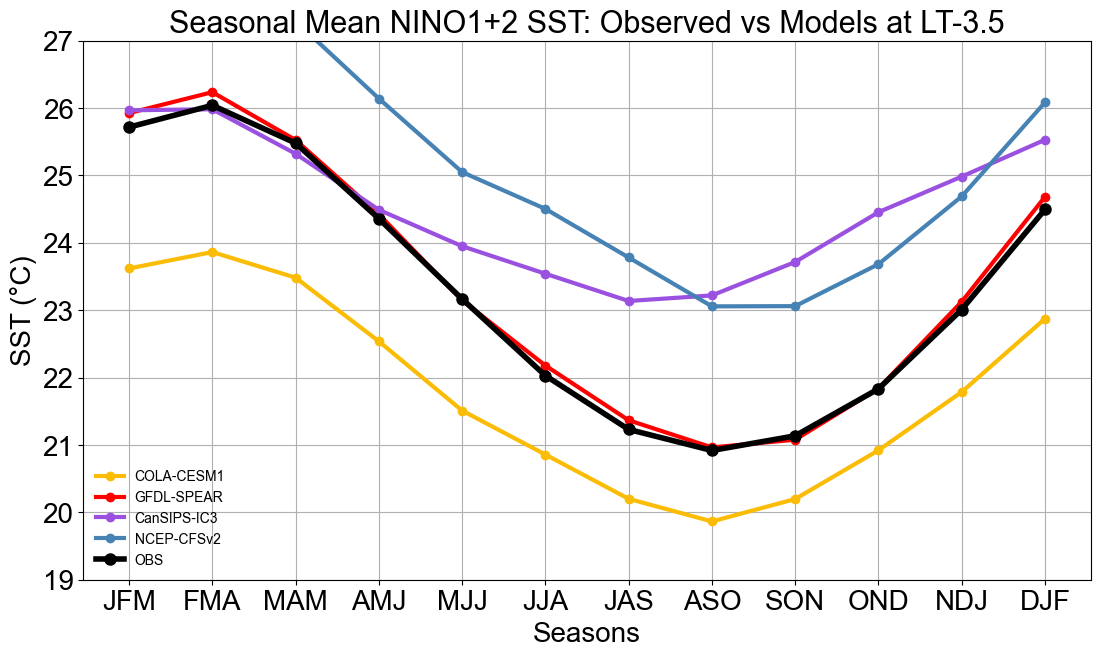

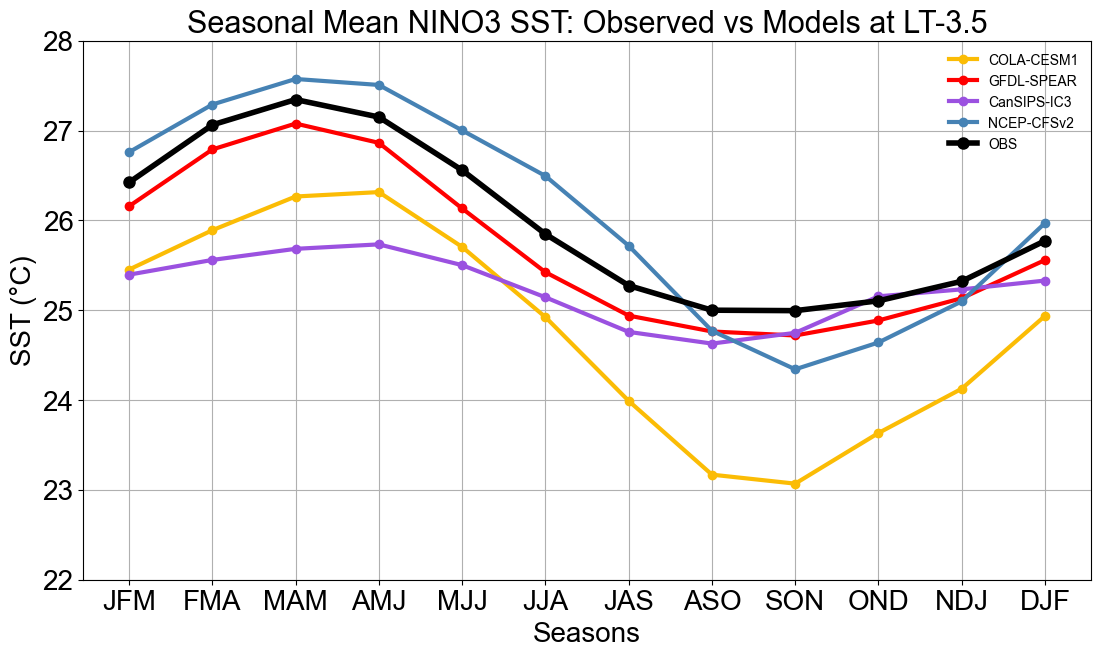

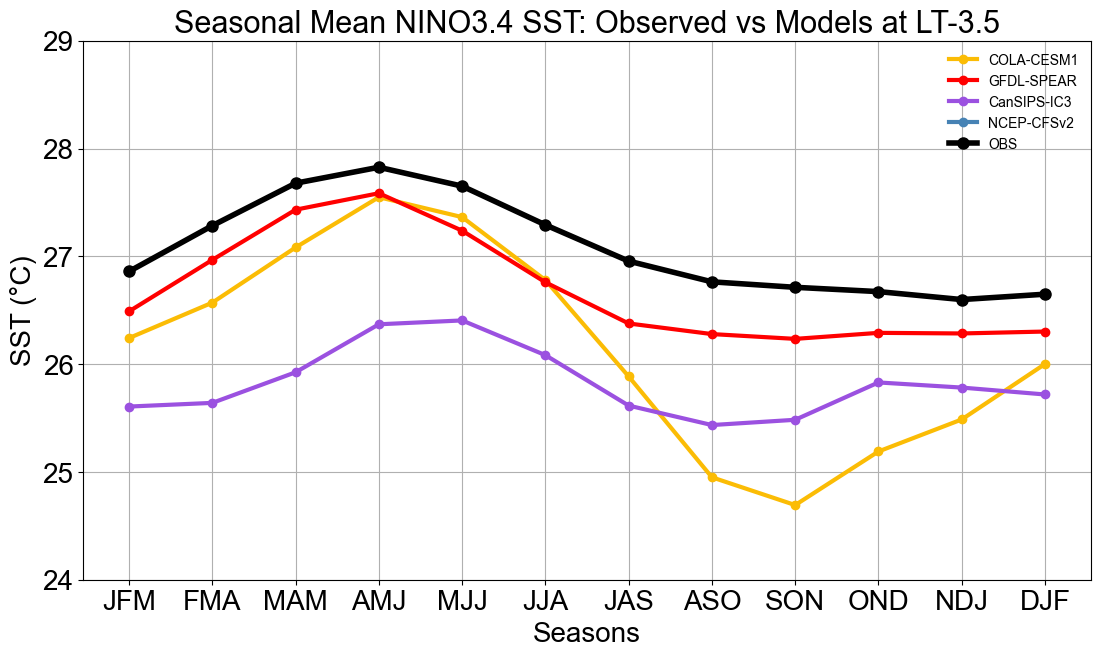

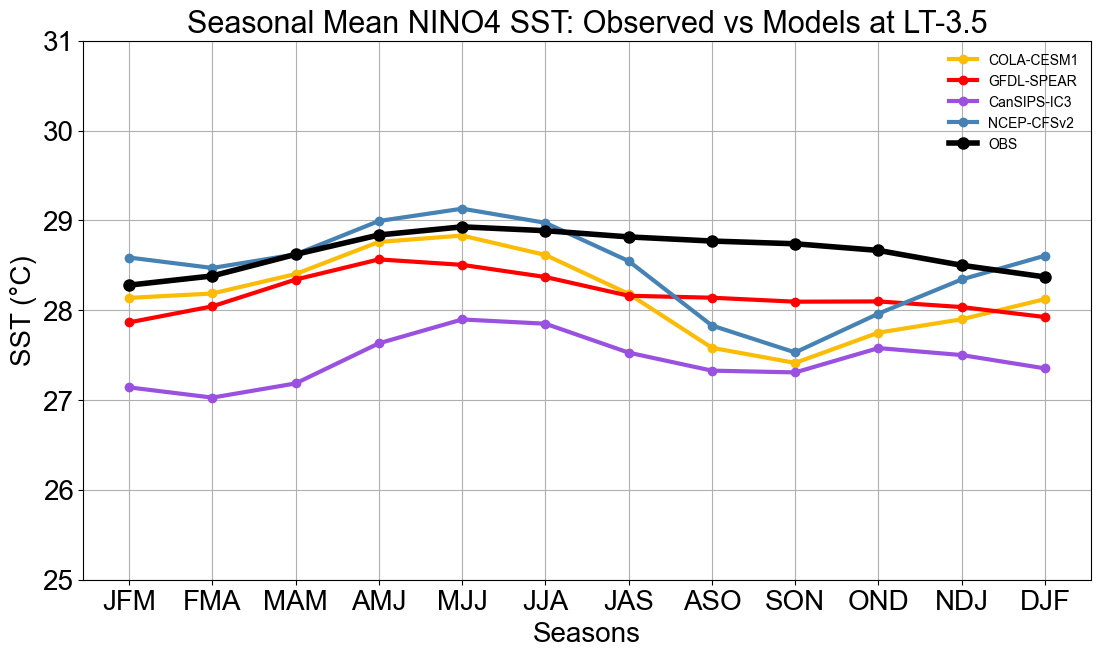

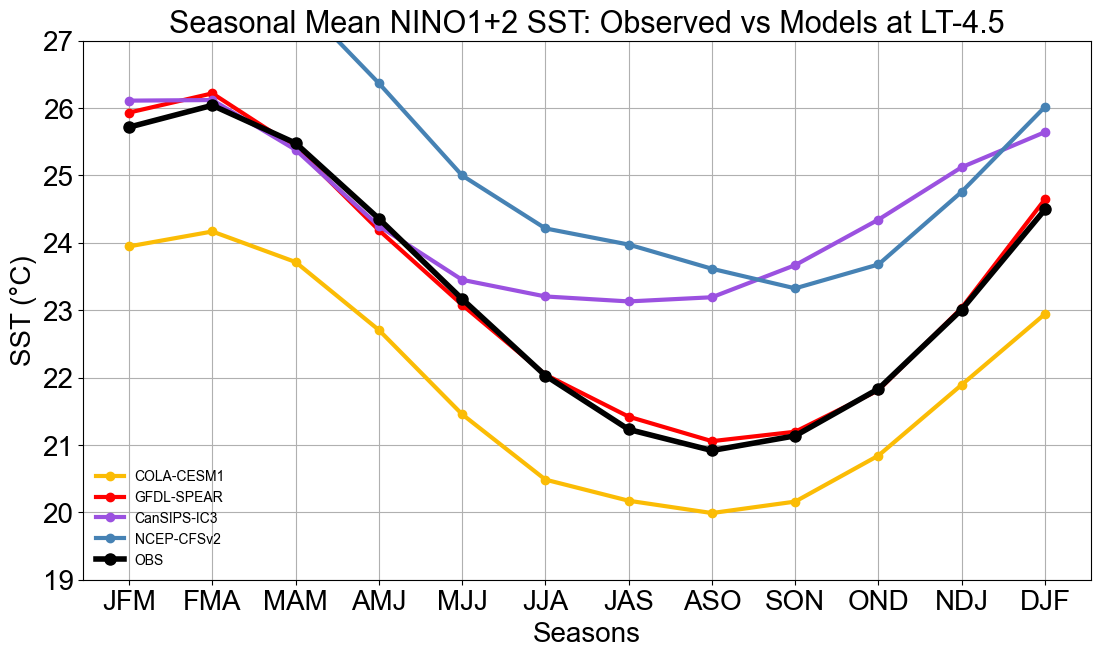

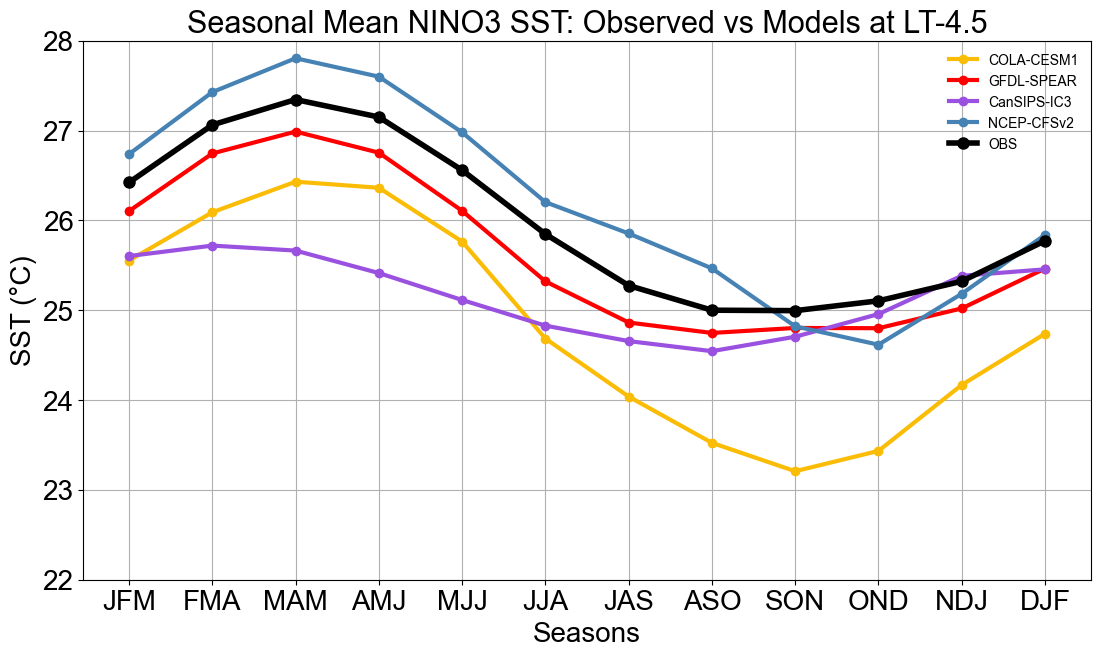

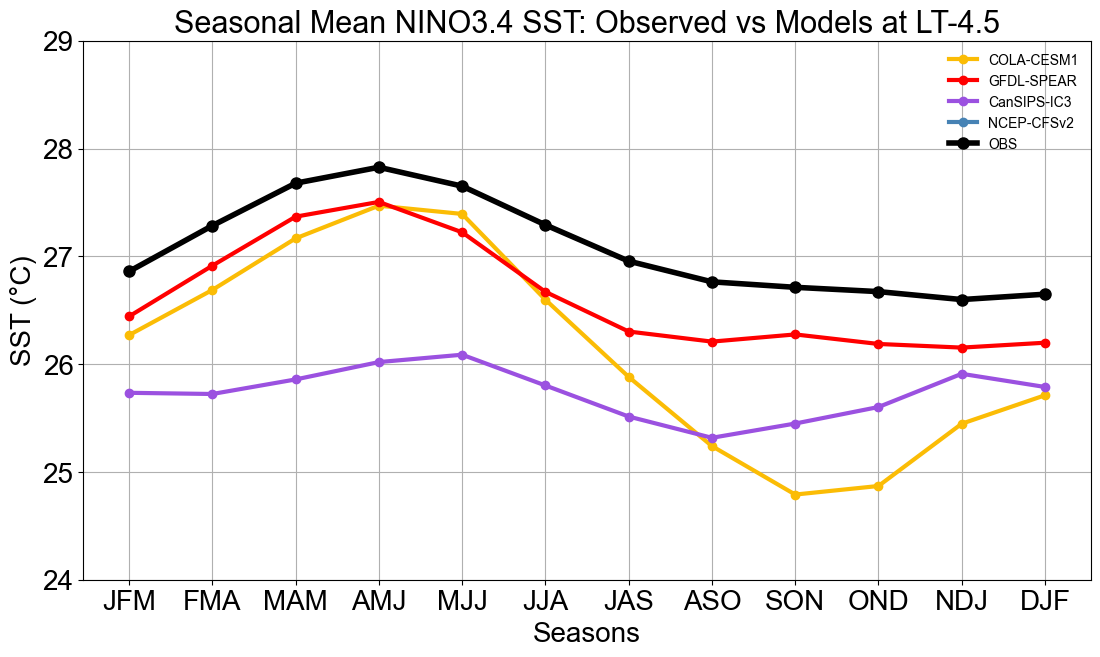

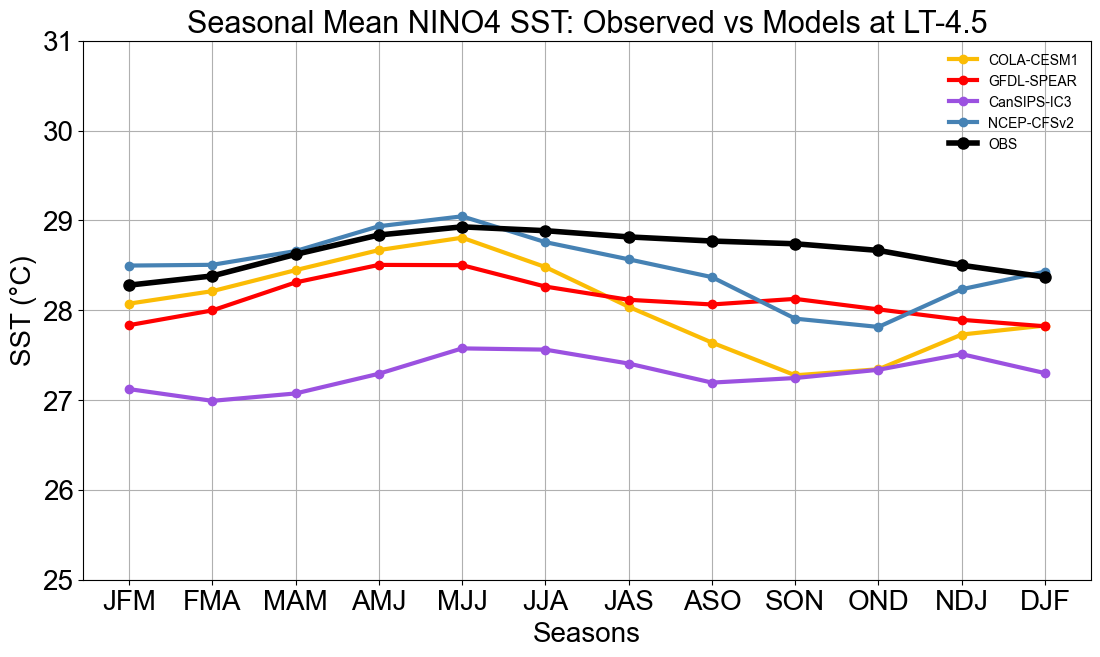

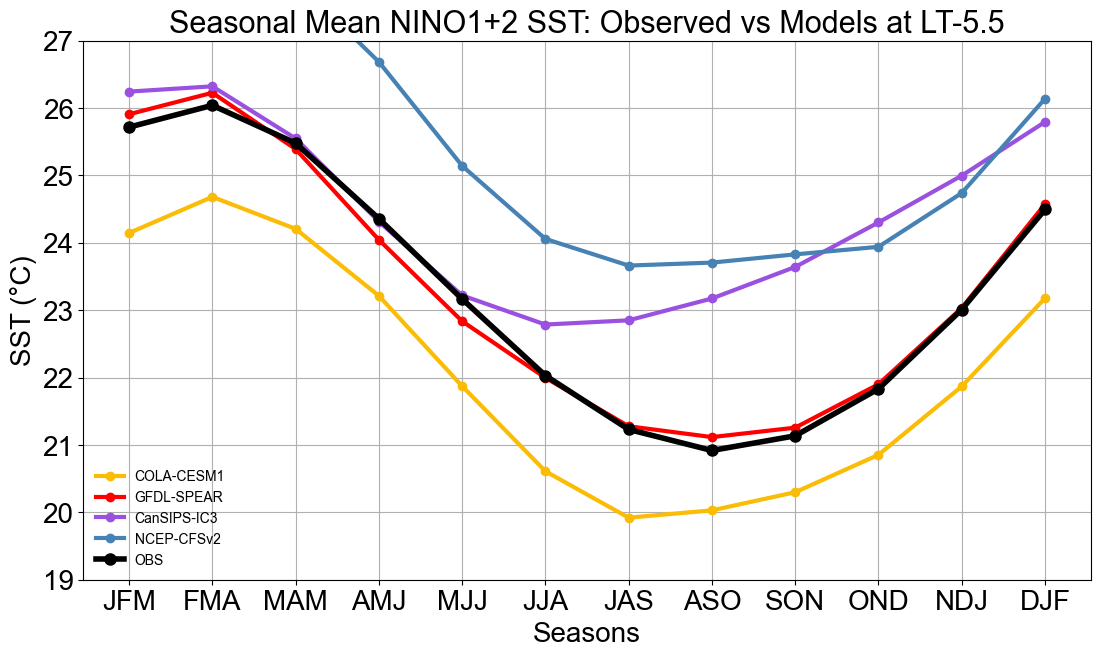

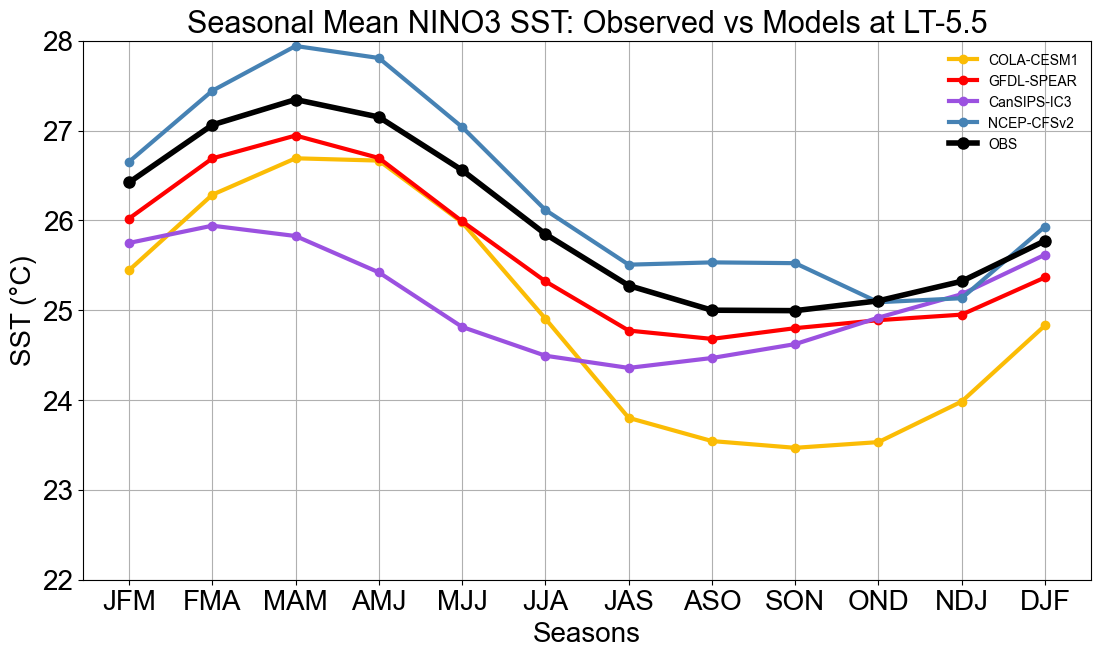

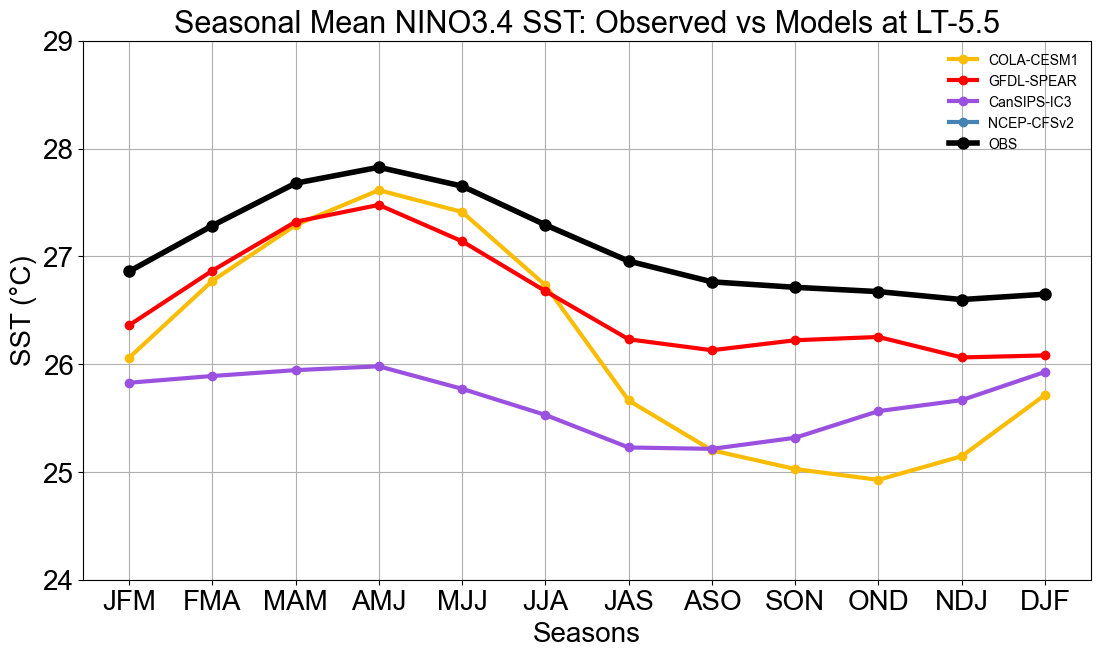

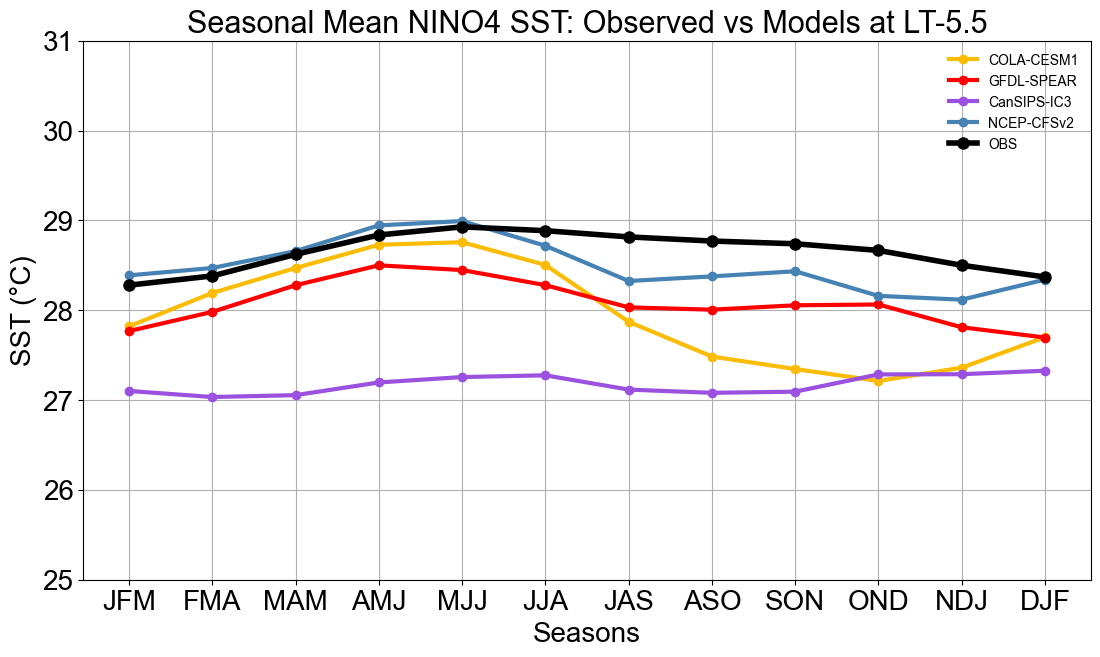

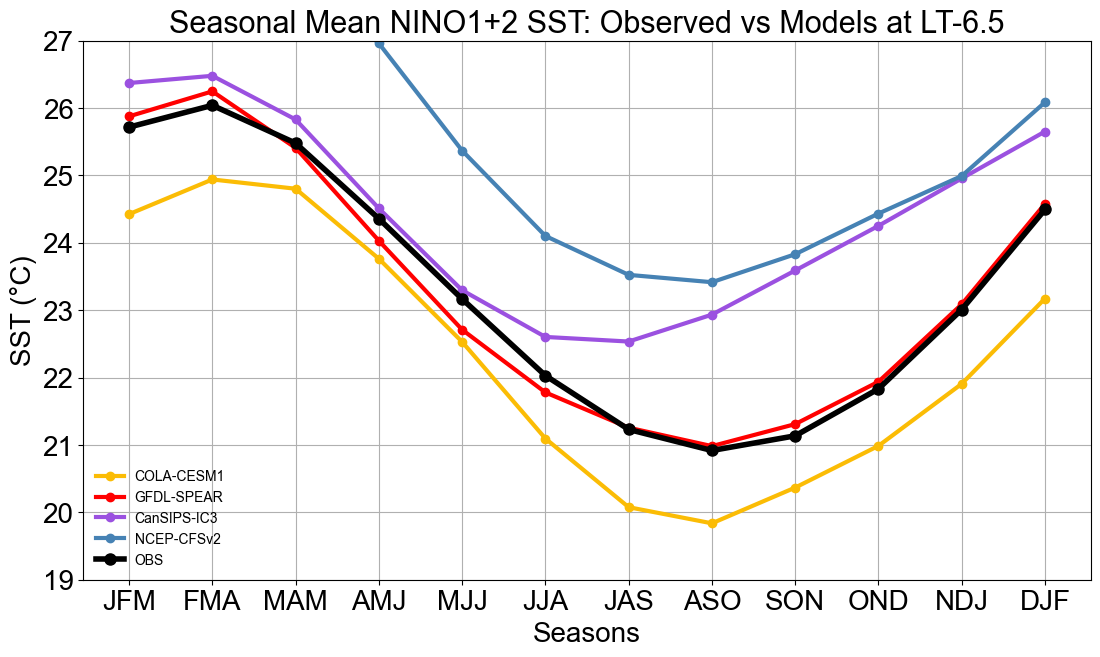

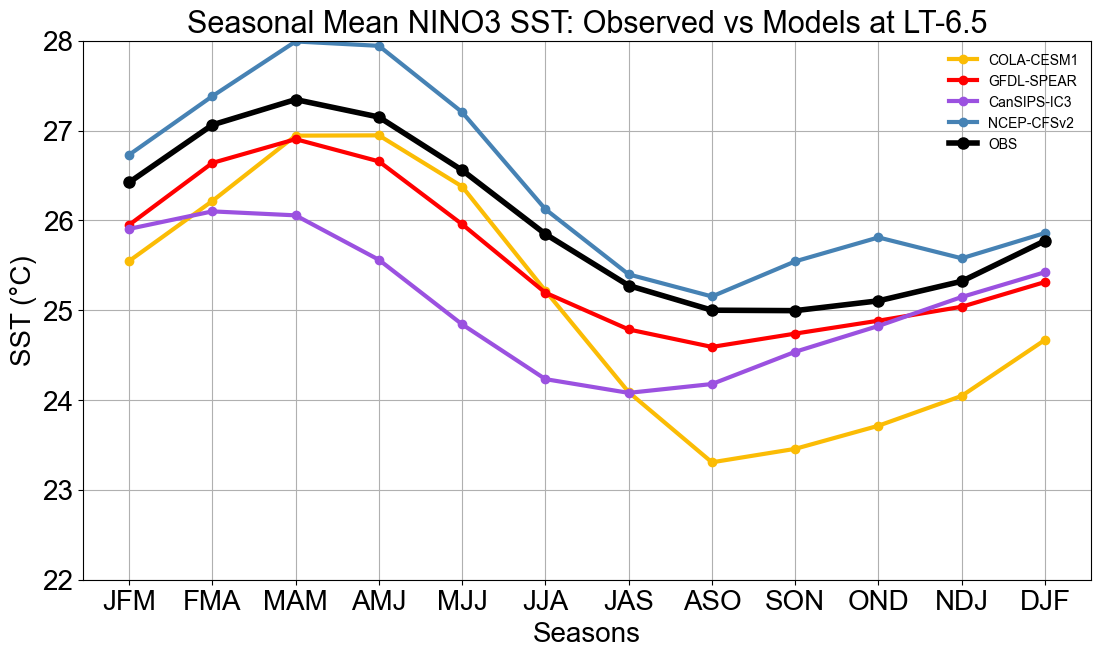

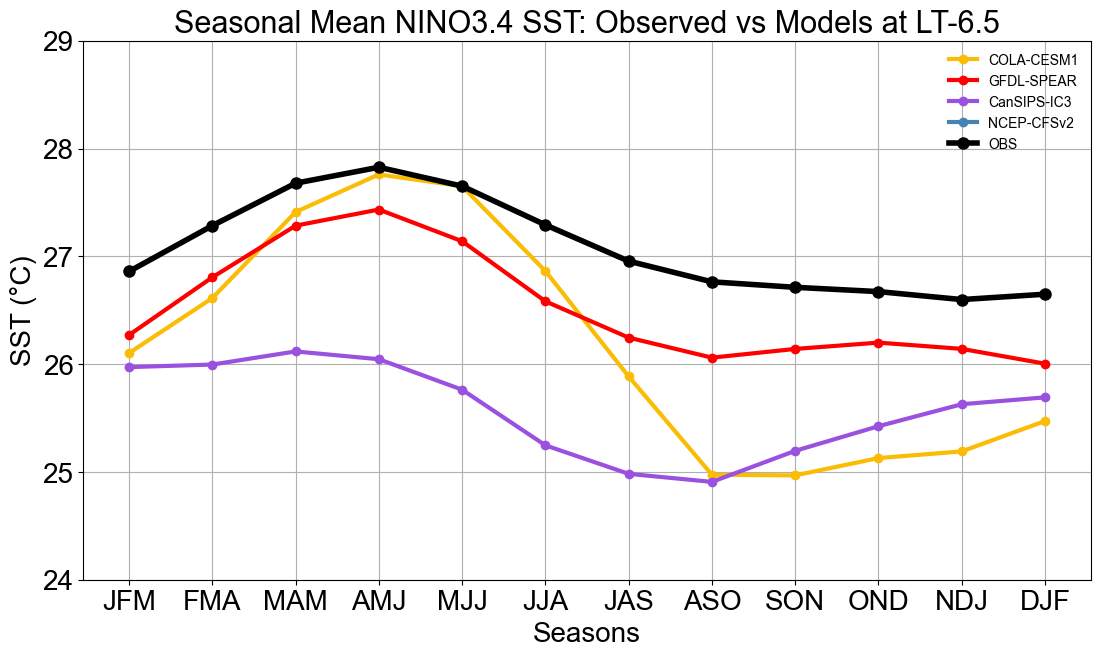

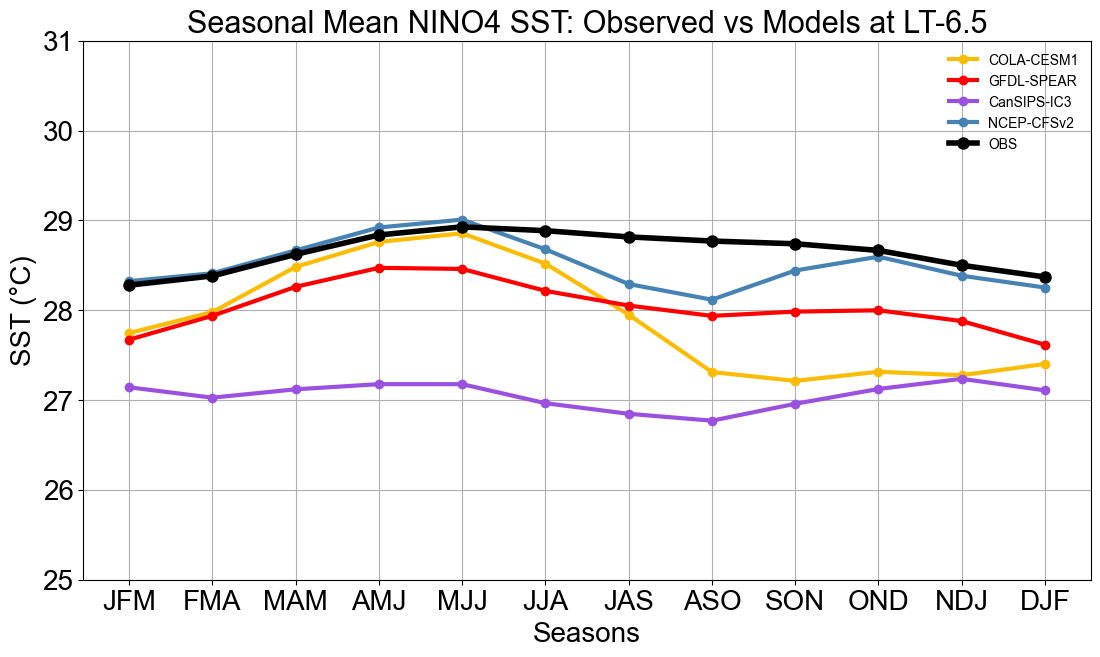

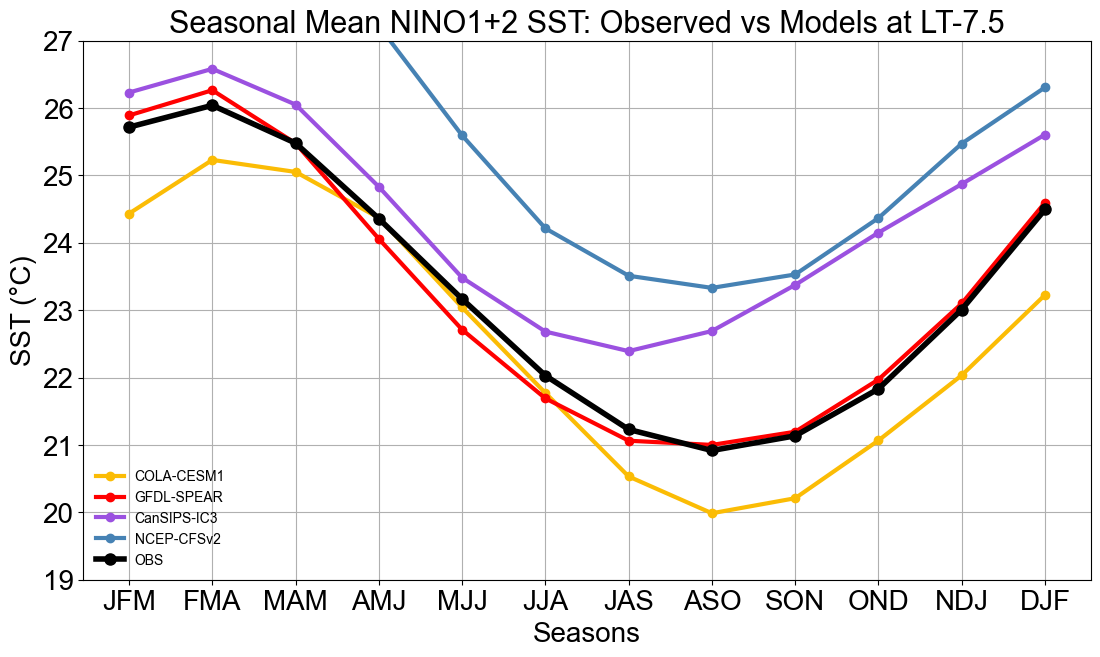

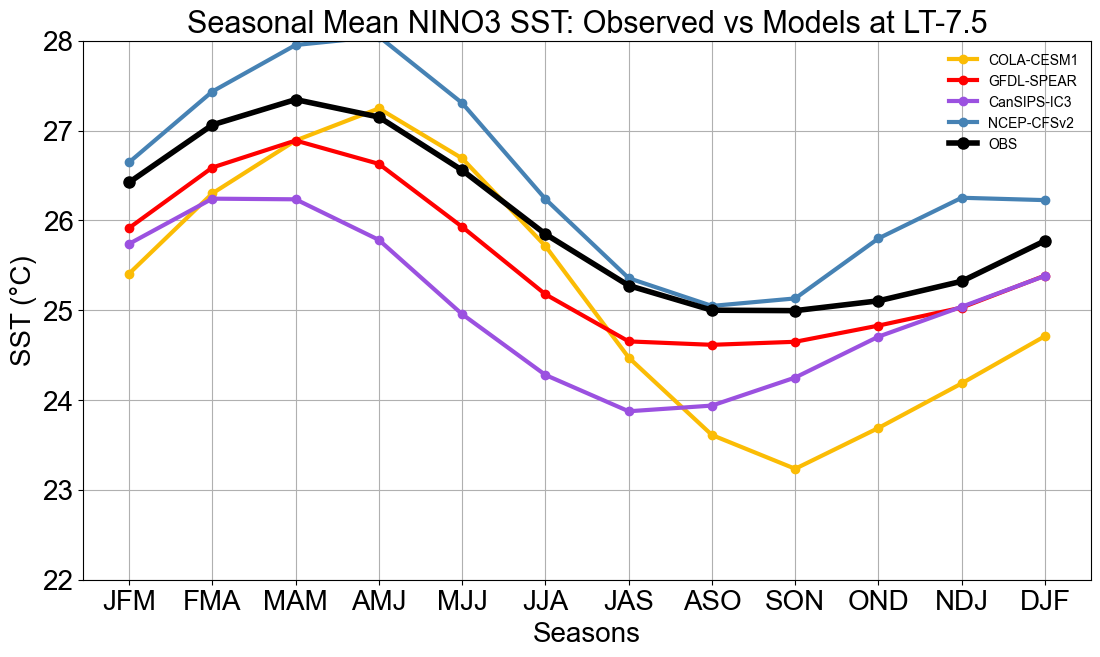

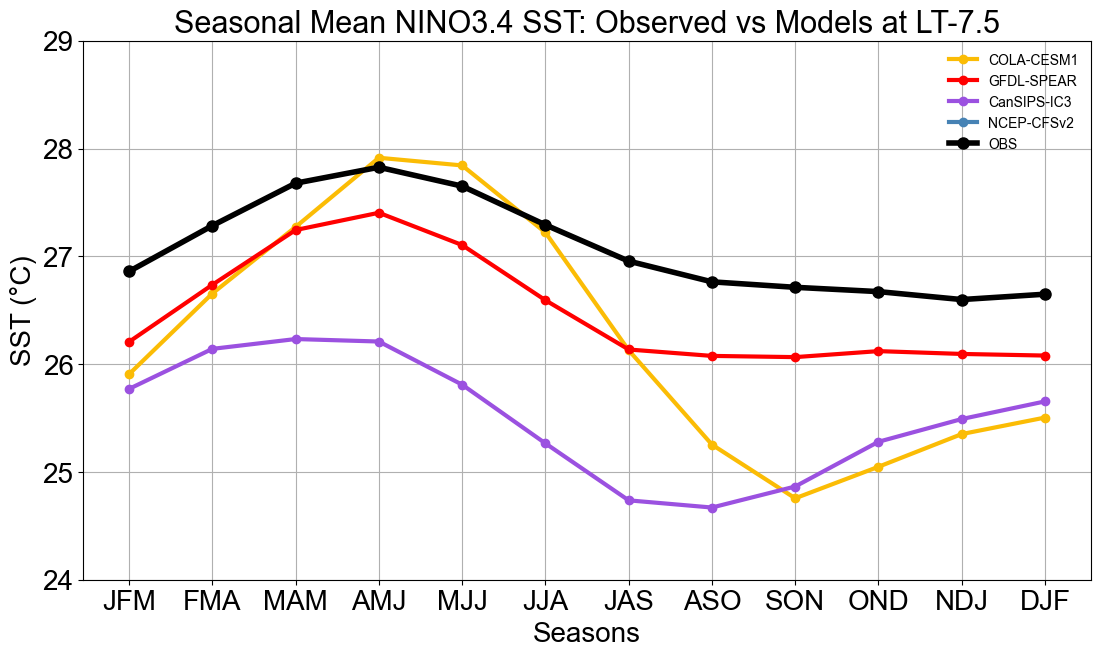

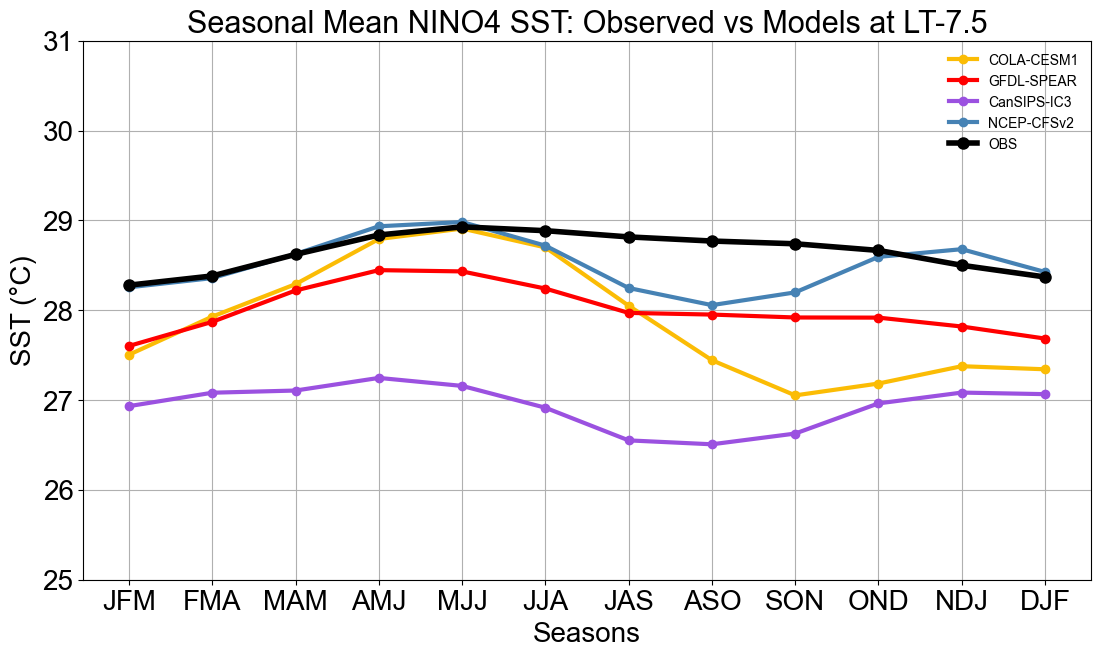

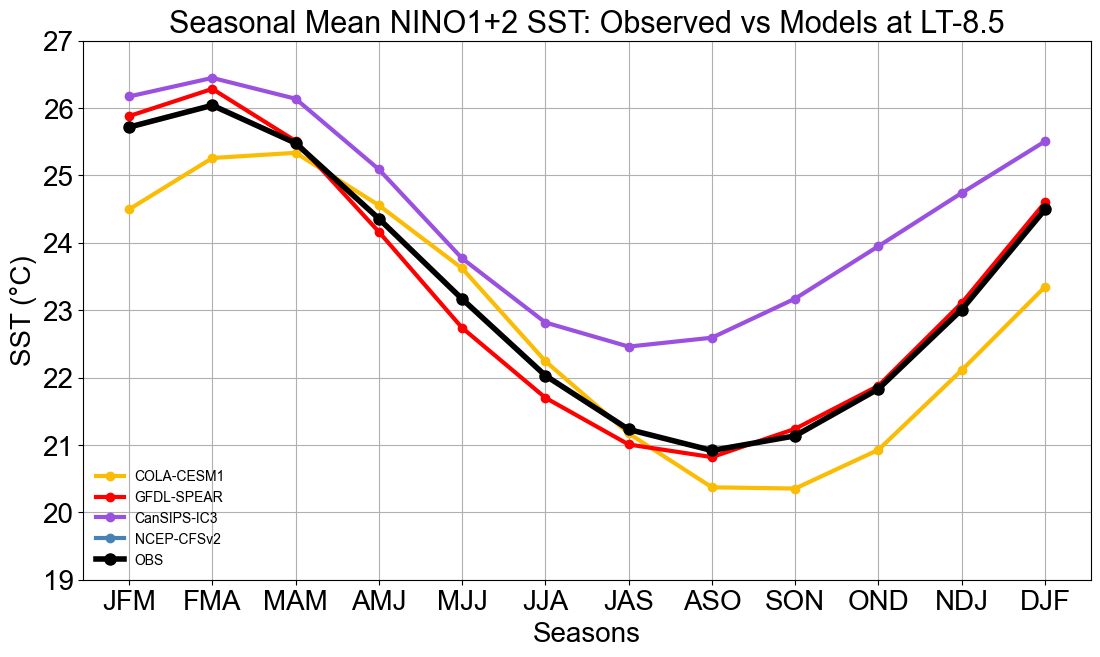

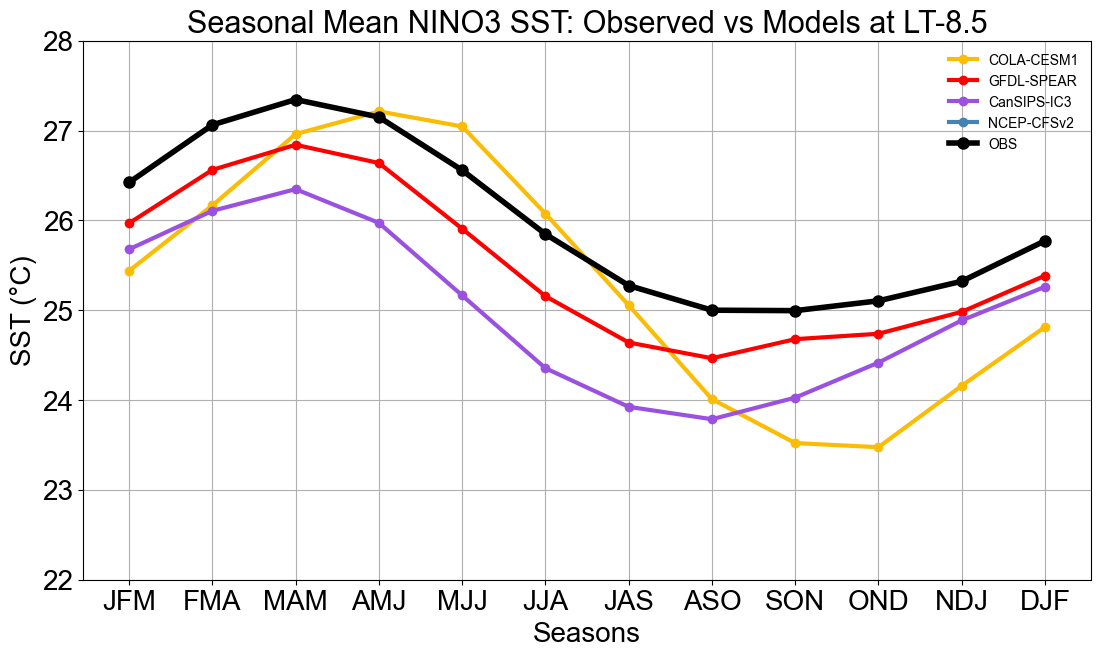

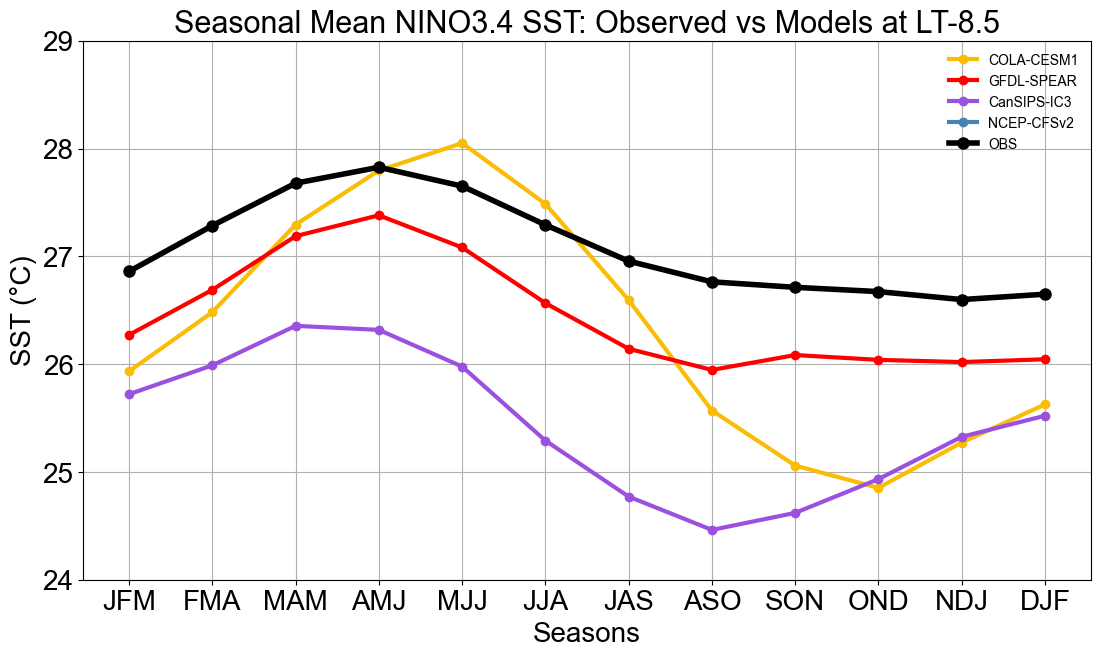

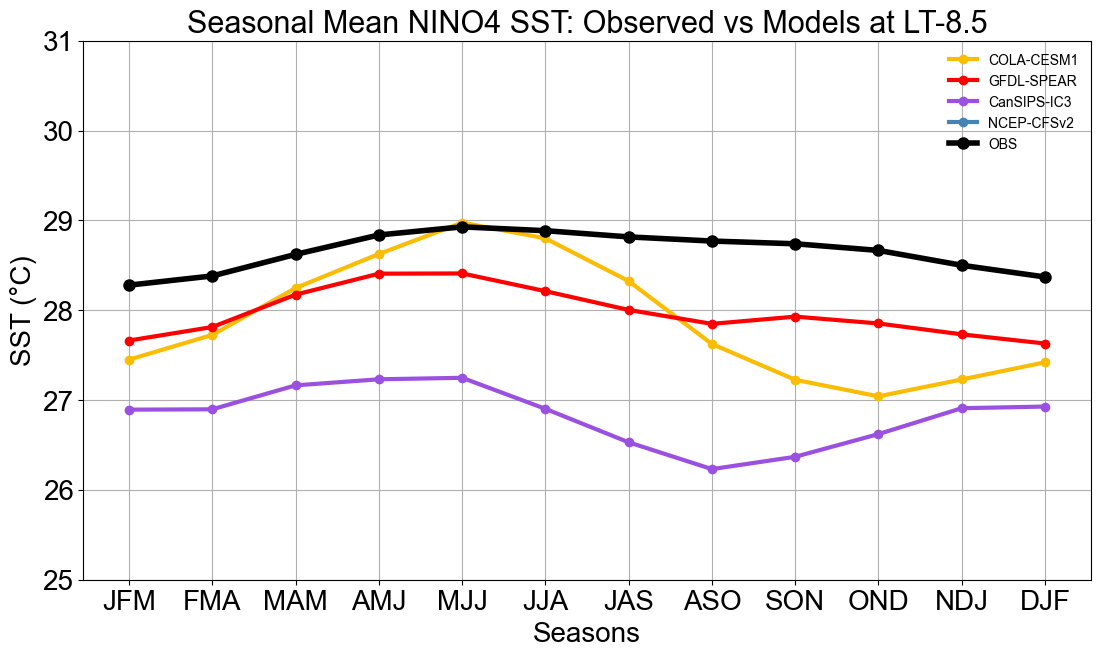

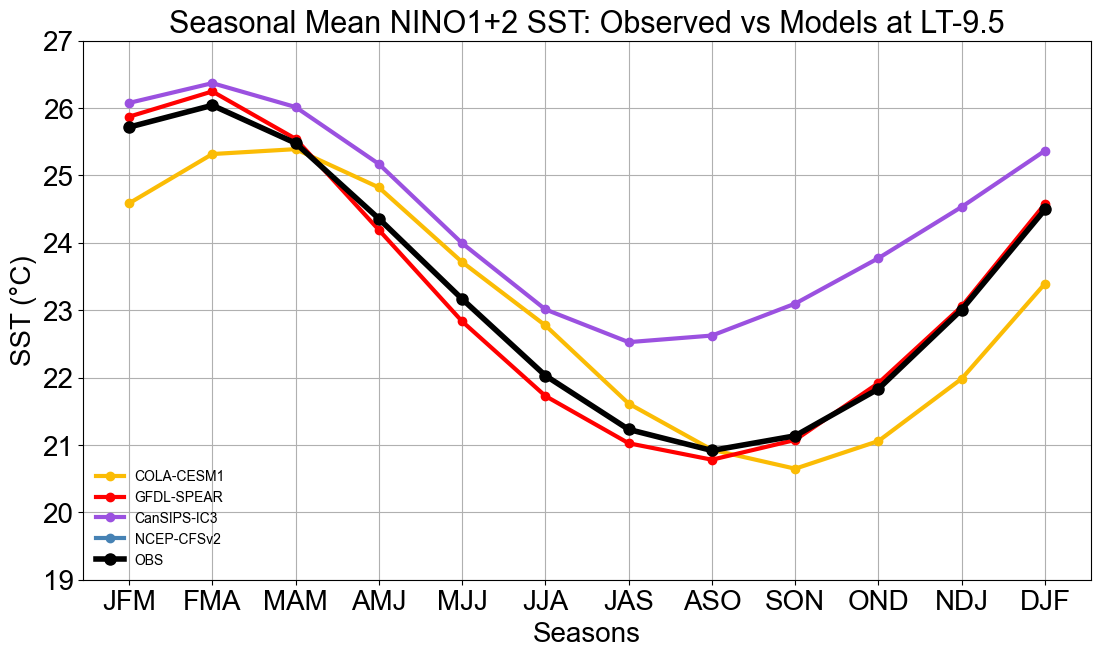

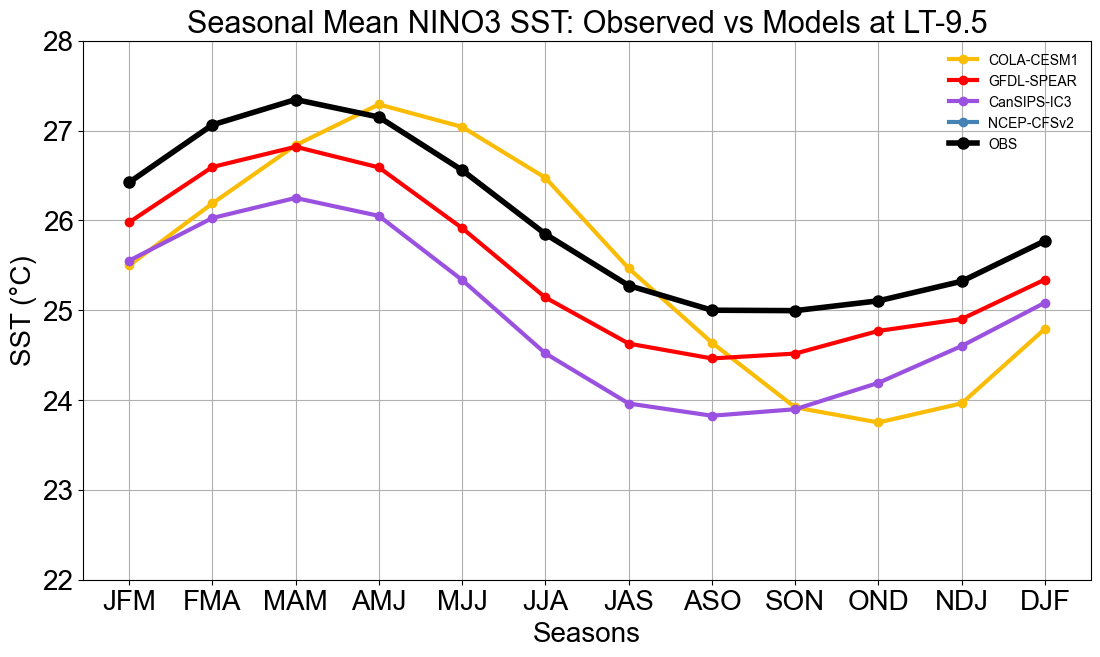

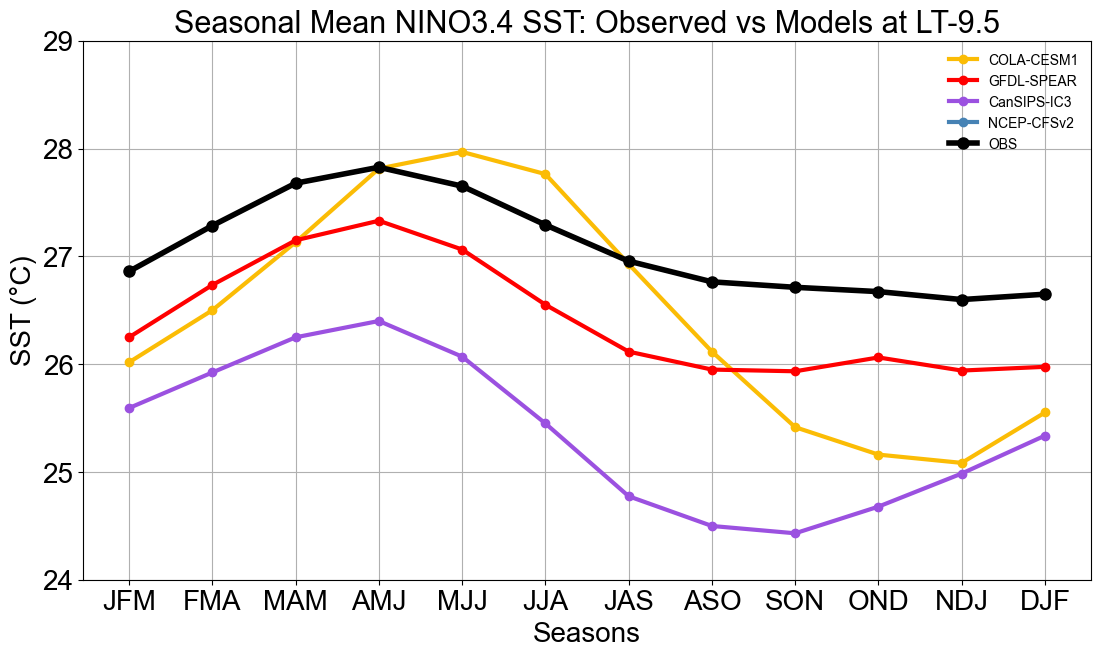

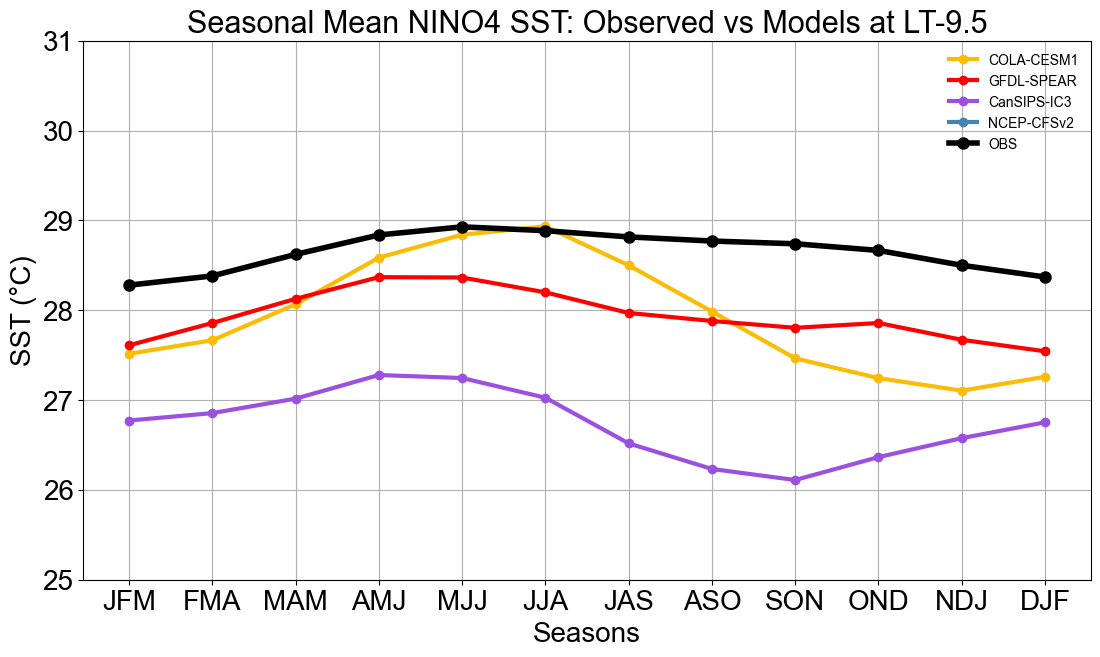

In [13]:
def multimodel_nino3_4_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC3'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax=29)
    #plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
    
def multimodel_nino1_2_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC3_ONETWO'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=19, ymax=27)
    #plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino3_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC3_THREE'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=22, ymax=28)
    #plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino4_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC3_FOUR'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=25, ymax=31)
    #plt.savefig(f'../Plots/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()


visualizer_functions = {
    '1+2': multimodel_nino1_2_visualizer,
    '3': multimodel_nino3_visualizer,
    '3.4': multimodel_nino3_4_visualizer,
    '4': multimodel_nino4_visualizer
}

# Higher-level function to call the appropriate visualizer function
def run_visualizer(region, lead):
    if region in visualizer_functions:
        visualizer_function = visualizer_functions[region]
        visualizer_function(region, lead)
    else:
        print(f"Error: Region {region} is not recognized. Valid regions are {list(visualizer_functions.keys())}.")


regions = ['1+2', '3', '3.4', '4']
leads =  [1,2,3,4,5,6,7,8,9,10]

for lead in leads:
    for region in regions:
       run_visualizer(region, lead)

#make a presentation.. for each lead time -> put the four regions in one 
#1+2 3
#3.4 4 -> arragnement of 2x2. by lead time. 
    